In [2]:
#Load necessary Libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.cluster import KMeans
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.offline as offline

# LOAD THE DATASET

In [15]:
df_tm_1 = pickle.load(open("6.topic_MM.pickle", 'rb'))
df_tm_2 = pickle.load(open("7.NM_topic.pickle", 'rb'))
df_tm_2.rename(columns={'topic': 'topic_cleaned'}, inplace=True)

# Append rows of df_tm_2 to df_tm_1
df_tm = pd.concat([df_tm_1, df_tm_2], axis=0)

# Reset the index of the combined dataframe
df_tm = df_tm.reset_index(drop=True)

# Display the combined dataframe
df_tm

,index,Date,Location,Title,Speech,Cleaned_Speech,Cleaned_Speech_string,topic_cleaned,prompt
0,MSS1,2004-06-24,New Delhi,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",['fellow citizen speak deep sense humility ful...,fellow citizen speak deep sense humility fully...,The author is exploring the need for reform in...,NaN
1,MSS2,2004-06-29,New Delhi,PM's inaugural address at the Chief Ministers'...,"""I welcome you all to this Conference which w...",['welcome conference take stock effort rural d...,welcome conference take stock effort rural dev...,The central theme of the text is rural develop...,NaN
2,MSS3,2004-07-03,New Delhi,"PM's inaugural address at the ""Dialogue on Min...","""It gives me great pleasure to be amongst you...","['give great pleasure amongst morning', 'parti...",give great pleasure amongst morning particular...,The central theme of the text is the empowerme...,NaN
3,MSS4,2004-07-26,New Delhi,PM's speech at the CSIR Society Meeting,"Distinguished Members of the CSIR Society, La...",['distinguished member csir society lady gentl...,distinguished member csir society lady gentlem...,The author is exploring the role of science an...,NaN
4,MSS5,2004-07-31,Bangkok,PM’ statement at the Press Conference,"\n\t""My two days in Bangkok have been very use...","['two day bangkok useful productive', 'first b...",two day bangkok useful productive first bimste...,The central theme that the author is exploring...,NaN
...,...,...,...,...,...,...,...,...,...
2528,NMS1178,2023-04-09,NaN,English rendering of PM’s address at the inaug...,My colleagues in the Union Cabinet Shri Bhupen...,['colleague union cabinet shri bhupender yadav...,colleague union cabinet shri bhupender yadav j...,"[, , A. The author is exploring the theme of e...",My colleagues in the Union Cabinet Shri Bhupen...
2529,NMS1179,2023-04-12,NaN,English rendering of PM’s address at training ...,Namaskar! \n\nThe campaign to provide governme...,"['namaskar', 'campaign provide government job ...",namaskar campaign provide government job youth...,"[, , The central theme of the author is explor...",Namaskar! The campaign to provide government j...
2530,NMS1180,2023-04-12,NaN,English rendering of PM’s address during flagg...,"Namaskar, Governor of Rajasthan Shri Kalraj Mi...",['namaskar governor rajasthan shri kalraj mish...,namaskar governor rajasthan shri kalraj mishra...,"[., , , , The central theme of the text is the...","Namaskar, Governor of Rajasthan Shri Kalraj Mi..."
2531,NMS1181,2023-04-14,NaN,English rendering of PM’s address at inaugurat...,"Governor of Assam Shri Gulab Chand Kataria ji,...",['governor assam shri gulab chand kataria ji c...,governor assam shri gulab chand kataria ji chi...,"[, , The author is exploring the idea that the...","Governor of Assam Shri Gulab Chand Kataria ji,..."


### Reducing dimensions to 3-D

In [5]:
df_umap = pickle.load(open("df_umap_3D.pickle", 'rb'))
df_umap

,x,y,z
0,2.898594,9.928911,7.609050
1,1.586409,7.393669,8.650178
2,1.872317,7.604838,10.589667
3,2.857250,8.581143,10.284215
4,2.992122,10.393358,7.404863
...,...,...,...
2528,2.797319,9.819474,9.748168
2529,3.103824,9.280266,10.570699
2530,2.909471,9.555931,9.597327
2531,2.989243,9.807272,10.071255


c:\Users\abcd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\abcd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\abcd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\abcd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



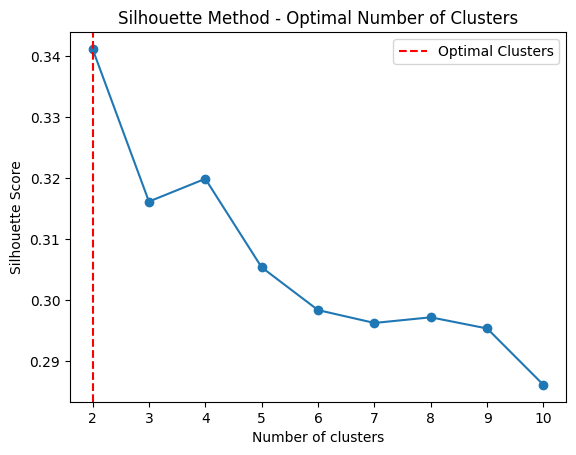

Optimal number of clusters: 2


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Create a list to store the silhouette scores
silhouette_scores = []

# Define the range of number of clusters
min_clusters = 2
max_clusters = 10

for n_clusters in range(min_clusters, max_clusters + 1):
    # Create a KMeans instance with n_clusters clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Fit the model to the UMAP data
    kmeans.fit(df_umap)

    # Predict the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(df_umap, labels)

    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters based on the highest silhouette score
optimal_clusters = np.argmax(silhouette_scores) + min_clusters

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method - Optimal Number of Clusters')
plt.xticks(range(min_clusters, max_clusters + 1))
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label='Optimal Clusters')
plt.legend()
plt.show()

print("Optimal number of clusters:", optimal_clusters)

# K-Means Clustering 
It is a popular unsupervised Ml model used for clustering data points into groups based on their similarity. It partitions the data into K clusters where each data point belongs to the cluster with nearest mean.

In [17]:
# import the KMeans model
from sklearn.cluster import KMeans

We idealy want clusters for each year.
We will use the elbow method to determine the number of clusters
Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset. It is a heuristic method to estimate the optimal number of clusters in a data set given by the sum of squared errors (SSE) within clusters.

In [18]:
# Create a KMeans instance with 5 clusters
model = KMeans(n_clusters=4, random_state=42)
# Fit model to df_umap
model.fit(df_umap)  # Assuming 'x' and 'y' are the UMAP coordinates


C:\Users\Yatika Arora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

### Plot the UMAP Model

In [8]:
%pip install plotly 

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install --upgrade nbformat


                                              0.0/77.6 kB ? eta -:--:--
     ---------------                          30.7/77.6 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 77.6/77.6 kB 1.1 MB/s eta 0:00:00
                                              0.0/90.4 kB ? eta -:--:--
     ---------------------------------------- 90.4/90.4 kB 5.0 MB/s eta 0:00:00
                                              0.0/62.7 kB ? eta -:--:--
     ---------------------------------------  61.4/62.7 kB 1.6 MB/s eta 0:00:01
     ---------------------------------------- 62.7/62.7 kB 1.1 MB/s eta 0:00:00


In [18]:
# Set the 'z' column values to 1 for rows up to index 1351
df_umap.loc[:1351, 'PM'] = 'Manmohan Singh'

# Set the 'z' column values to 2 for rows starting from index 1351
df_umap.loc[1351:, 'PM'] = 'Narendra Modi'

fig = px.scatter_3d(
    df_umap,  # DataFrame containing the data
    x='x',          # Column name for the x-axis values
    y='y',          # Column name for the y-axis values
    z='z',          # Column name for the z-axis values
    color='PM',     # Column name for assigning colors based on cluster
    size='z',      # Column name for assigning marker size based on cluster
    size_max=10,
    color_discrete_sequence = ['maroon', 'blue']          
)

# Customize the layout of the figure
fig.update_layout(
    height=800,  # Set the height of the figure
    width=1000   # Set the width of the figure
)

# Display the plot
fig.show()

# Generate HTML file with the plot
offline.plot(fig, filename='MS_NM_3D.html')


'MS_NM_3D.html'

NM speeches are not diversified whereas MS speeches are quite diversified (quantify that) -> information theory algo -> entropy 

In [19]:
# Load the pickled object from "0.META.pickle" file
meta_df = pickle.load(open("0.META.pickle", 'rb'))

In [20]:
meta_df

,index,Date,Title,Speech,Cleaned_Speech,Cleaned_Speech_string
0,MSS1,2004-06-24,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",['fellow citizen speak deep sense humility ful...,fellow citizen speak deep sense humility fully...
1,MSS2,2004-06-29,PM's inaugural address at the Chief Ministers'...,"""I welcome you all to this Conference which w...",['welcome conference take stock effort rural d...,welcome conference take stock effort rural dev...
2,MSS3,2004-07-03,"PM's inaugural address at the ""Dialogue on Min...","""It gives me great pleasure to be amongst you...","['give great pleasure amongst morning', 'parti...",give great pleasure amongst morning particular...
3,MSS4,2004-07-26,PM's speech at the CSIR Society Meeting,"Distinguished Members of the CSIR Society, La...",['distinguished member csir society lady gentl...,distinguished member csir society lady gentlem...
4,MSS5,2004-07-31,PM’ statement at the Press Conference,"\n\t""My two days in Bangkok have been very use...","['two day bangkok useful productive', 'first b...",two day bangkok useful productive first bimste...
...,...,...,...,...,...,...
2528,NMS1178,2023-04-09,English rendering of PM’s address at the inaug...,My colleagues in the Union Cabinet Shri Bhupen...,['colleague union cabinet shri bhupender yadav...,colleague union cabinet shri bhupender yadav j...
2529,NMS1179,2023-04-12,English rendering of PM’s address at training ...,Namaskar! \n\nThe campaign to provide governme...,"['namaskar', 'campaign provide government job ...",namaskar campaign provide government job youth...
2530,NMS1180,2023-04-12,English rendering of PM’s address during flagg...,"Namaskar, Governor of Rajasthan Shri Kalraj Mi...",['namaskar governor rajasthan shri kalraj mish...,namaskar governor rajasthan shri kalraj mishra...
2531,NMS1181,2023-04-14,English rendering of PM’s address at inaugurat...,"Governor of Assam Shri Gulab Chand Kataria ji,...",['governor assam shri gulab chand kataria ji c...,governor assam shri gulab chand kataria ji chi...


In [21]:

meta_df_req = pd.DataFrame({
    'Title': meta_df['Title'],
    'Speech': meta_df['Speech'],
    "Cleaned_Speech": meta_df["Cleaned_Speech_string"]
})


In [22]:

# Embed the date column into the UMAP model, create a new dataframe
df_dim_date = pd.concat([df_umap, meta_df['Date']], axis=1)

# Only keep the year in the date column, date is in string, in lambda function, convert it to datetime, and then extract the year
df_dim_date['Date'] = df_dim_date['Date'].apply(lambda x: pd.to_datetime(x).year)

# Delete the entry with year nan
df_dim_date = df_dim_date[df_dim_date['Date'] != 'nan']

# Append the cluster label to the dataframe of df_dim_date and umap
df_dim_date['cluster'] = model.labels_

# Concatenate meta_df['index'] and df_dim_date along axis 1
df_dim_date = pd.concat([meta_df['index'], df_dim_date], axis=1)

# Convert the cluster label to a string and prepend 'C' to it
df_dim_date['cluster'] = df_dim_date['cluster'].apply(lambda x: f"C{x}")



df_dim_date = pd.concat([df_dim_date,meta_df_req], axis=1)

df_dim_date = pd.concat([df_dim_date, df_tm['topic_cleaned']], axis=1)
# Display the resulting dataframe
df_dim_date


,index,x,y,z,Date,cluster,Title,Speech,Cleaned_Speech,topic_cleaned
0,MSS1,2.898594,9.928911,7.609050,2004,C1,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",fellow citizen speak deep sense humility fully...,The author is exploring the need for reform in...
1,MSS2,1.586409,7.393669,8.650178,2004,C0,PM's inaugural address at the Chief Ministers'...,"""I welcome you all to this Conference which w...",welcome conference take stock effort rural dev...,The central theme of the text is rural develop...
2,MSS3,1.872317,7.604838,10.589667,2004,C0,"PM's inaugural address at the ""Dialogue on Min...","""It gives me great pleasure to be amongst you...",give great pleasure amongst morning particular...,The central theme of the text is the empowerme...
3,MSS4,2.857250,8.581143,10.284215,2004,C2,PM's speech at the CSIR Society Meeting,"Distinguished Members of the CSIR Society, La...",distinguished member csir society lady gentlem...,The author is exploring the role of science an...
4,MSS5,2.992122,10.393358,7.404863,2004,C1,PM’ statement at the Press Conference,"\n\t""My two days in Bangkok have been very use...",two day bangkok useful productive first bimste...,The central theme that the author is exploring...
...,...,...,...,...,...,...,...,...,...,...
2528,NMS1178,2.797319,9.819474,9.748168,2023,C2,English rendering of PM’s address at the inaug...,My colleagues in the Union Cabinet Shri Bhupen...,colleague union cabinet shri bhupender yadav j...,"[, , A. The author is exploring the theme of e..."
2529,NMS1179,3.103824,9.280266,10.570699,2023,C2,English rendering of PM’s address at training ...,Namaskar! \n\nThe campaign to provide governme...,namaskar campaign provide government job youth...,"[, , The central theme of the author is explor..."
2530,NMS1180,2.909471,9.555931,9.597327,2023,C2,English rendering of PM’s address during flagg...,"Namaskar, Governor of Rajasthan Shri Kalraj Mi...",namaskar governor rajasthan shri kalraj mishra...,"[., , , , The central theme of the text is the..."
2531,NMS1181,2.989243,9.807272,10.071255,2023,C2,English rendering of PM’s address at inaugurat...,"Governor of Assam Shri Gulab Chand Kataria ji,...",governor assam shri gulab chand kataria ji chi...,"[, , The author is exploring the idea that the..."


In [23]:
df_dim_date.loc[:1351, 'PM'] = 'Manmohan Singh'
df_dim_date.loc[1351:,"PM"] = "Narendra Modi"

In [24]:
df_dim_date


,index,x,y,z,Date,cluster,Title,Speech,Cleaned_Speech,topic_cleaned,PM
0,MSS1,2.898594,9.928911,7.609050,2004,C1,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",fellow citizen speak deep sense humility fully...,The author is exploring the need for reform in...,Manmohan Singh
1,MSS2,1.586409,7.393669,8.650178,2004,C0,PM's inaugural address at the Chief Ministers'...,"""I welcome you all to this Conference which w...",welcome conference take stock effort rural dev...,The central theme of the text is rural develop...,Manmohan Singh
2,MSS3,1.872317,7.604838,10.589667,2004,C0,"PM's inaugural address at the ""Dialogue on Min...","""It gives me great pleasure to be amongst you...",give great pleasure amongst morning particular...,The central theme of the text is the empowerme...,Manmohan Singh
3,MSS4,2.857250,8.581143,10.284215,2004,C2,PM's speech at the CSIR Society Meeting,"Distinguished Members of the CSIR Society, La...",distinguished member csir society lady gentlem...,The author is exploring the role of science an...,Manmohan Singh
4,MSS5,2.992122,10.393358,7.404863,2004,C1,PM’ statement at the Press Conference,"\n\t""My two days in Bangkok have been very use...",two day bangkok useful productive first bimste...,The central theme that the author is exploring...,Manmohan Singh
...,...,...,...,...,...,...,...,...,...,...,...
2528,NMS1178,2.797319,9.819474,9.748168,2023,C2,English rendering of PM’s address at the inaug...,My colleagues in the Union Cabinet Shri Bhupen...,colleague union cabinet shri bhupender yadav j...,"[, , A. The author is exploring the theme of e...",Narendra Modi
2529,NMS1179,3.103824,9.280266,10.570699,2023,C2,English rendering of PM’s address at training ...,Namaskar! \n\nThe campaign to provide governme...,namaskar campaign provide government job youth...,"[, , The central theme of the author is explor...",Narendra Modi
2530,NMS1180,2.909471,9.555931,9.597327,2023,C2,English rendering of PM’s address during flagg...,"Namaskar, Governor of Rajasthan Shri Kalraj Mi...",namaskar governor rajasthan shri kalraj mishra...,"[., , , , The central theme of the text is the...",Narendra Modi
2531,NMS1181,2.989243,9.807272,10.071255,2023,C2,English rendering of PM’s address at inaugurat...,"Governor of Assam Shri Gulab Chand Kataria ji,...",governor assam shri gulab chand kataria ji chi...,"[, , The author is exploring the idea that the...",Narendra Modi


In [25]:
df_final = pd.DataFrame({
    "Index": df_dim_date["index"],
    "Date": meta_df["Date"],
    "PM": df_dim_date["PM"],
    "Cluster": df_dim_date["cluster"],
    'Title': df_dim_date['Title'],
    'Speech': df_dim_date['Speech'],
    "Cleaned_Speech": df_dim_date["Cleaned_Speech"],
    "Topic": df_dim_date["topic_cleaned"]


})

In [26]:
df_final=df_final.sort_values("Cluster")

In [27]:
df_final

,Index,Date,PM,Cluster,Title,Speech,Cleaned_Speech,Topic
1611,NMS261,2019-01-28,Narendra Modi,C0,English rendering of PM’s Speech at NCC Rally ...,Bharat Mata ki Jai!Bharat Mata ki Jai!Bharat M...,bharat mata ki jai bharat mata ki jai bharat m...,"[, , The author is exploring the central theme..."
512,MSS527,2007-05-19,Manmohan Singh,C0,PM Inaugurates Meeting of Kendriya Sainik Board,"""I am indeed happy to be here today for this v...",indeed happy today important meeting welfare w...,The central theme of the text is the welfare o...
513,MSS528,2007-05-22,Manmohan Singh,C0,Third Anniversary of UPA Government : Release...,"\n\tLadies and Gentlemen,\n\t \n\tWe are gathe...",lady gentleman gathered present annual report ...,The central theme that the author is exploring...
1172,MSS1220,2012-11-10,Manmohan Singh,C0,PM's speech at the Economic Times Awards for C...,I am delighted to be here for the Economic Tim...,delighted economic time award corporate excell...,The author is exploring the theme of economic ...
516,MSS531,2007-05-23,Manmohan Singh,C0,"PM releases a book titled ""1965 War - Inside S...","""I am delighted to release my friend, Shri R.D...",delighted release friend shri r pradhan book l...,The central theme of the text is the importanc...
...,...,...,...,...,...,...,...,...
1168,MSS1216,2012-11-01,Manmohan Singh,C3,PM's opening remarks at the meeting of Council...,\n\tMy Cabinet Colleagues and Members of the U...,cabinet colleague member union council ministe...,The author is exploring the theme of economic ...
1167,MSS1214,2012-10-20,Manmohan Singh,C3,PM’s address (English translation) on the laun...,"\n\tTwo years ago, I along with the UPA chairp...",two year ago along upa chairperson smt sonia g...,The central theme of the author is exploring i...
1964,NMS614,2021-02-18,Narendra Modi,C3,English rendering of PM’s address at the webin...,"Greetings my friends,The country's energy sect...",greeting friend country energy sector big role...,"[, , , , The central theme that the author is ..."
1192,MSS1240,2013-01-03,Manmohan Singh,C3,PM’s address at the Indian Science Congress,"\n\t""As General President of the Indian Scienc...",general president indian science congress asso...,The author is exploring the idea that science ...


In [28]:
df_final = df_final.reset_index(drop=True)

In [29]:
df_final

,Index,Date,PM,Cluster,Title,Speech,Cleaned_Speech,Topic
0,NMS261,2019-01-28,Narendra Modi,C0,English rendering of PM’s Speech at NCC Rally ...,Bharat Mata ki Jai!Bharat Mata ki Jai!Bharat M...,bharat mata ki jai bharat mata ki jai bharat m...,"[, , The author is exploring the central theme..."
1,MSS527,2007-05-19,Manmohan Singh,C0,PM Inaugurates Meeting of Kendriya Sainik Board,"""I am indeed happy to be here today for this v...",indeed happy today important meeting welfare w...,The central theme of the text is the welfare o...
2,MSS528,2007-05-22,Manmohan Singh,C0,Third Anniversary of UPA Government : Release...,"\n\tLadies and Gentlemen,\n\t \n\tWe are gathe...",lady gentleman gathered present annual report ...,The central theme that the author is exploring...
3,MSS1220,2012-11-10,Manmohan Singh,C0,PM's speech at the Economic Times Awards for C...,I am delighted to be here for the Economic Tim...,delighted economic time award corporate excell...,The author is exploring the theme of economic ...
4,MSS531,2007-05-23,Manmohan Singh,C0,"PM releases a book titled ""1965 War - Inside S...","""I am delighted to release my friend, Shri R.D...",delighted release friend shri r pradhan book l...,The central theme of the text is the importanc...
...,...,...,...,...,...,...,...,...
2528,MSS1216,2012-11-01,Manmohan Singh,C3,PM's opening remarks at the meeting of Council...,\n\tMy Cabinet Colleagues and Members of the U...,cabinet colleague member union council ministe...,The author is exploring the theme of economic ...
2529,MSS1214,2012-10-20,Manmohan Singh,C3,PM’s address (English translation) on the laun...,"\n\tTwo years ago, I along with the UPA chairp...",two year ago along upa chairperson smt sonia g...,The central theme of the author is exploring i...
2530,NMS614,2021-02-18,Narendra Modi,C3,English rendering of PM’s address at the webin...,"Greetings my friends,The country's energy sect...",greeting friend country energy sector big role...,"[, , , , The central theme that the author is ..."
2531,MSS1240,2013-01-03,Manmohan Singh,C3,PM’s address at the Indian Science Congress,"\n\t""As General President of the Indian Scienc...",general president indian science congress asso...,The author is exploring the idea that science ...


In [30]:
df_ann = open("df_ann.pickle", "wb")
pickle.dump(df_final, df_ann)
df_ann.close()

In [31]:
df_1 = pickle.load(open("df_ann.pickle", 'rb'))

In [32]:
df_1

,Index,Date,PM,Cluster,Title,Speech,Cleaned_Speech,Topic
0,NMS261,2019-01-28,Narendra Modi,C0,English rendering of PM’s Speech at NCC Rally ...,Bharat Mata ki Jai!Bharat Mata ki Jai!Bharat M...,bharat mata ki jai bharat mata ki jai bharat m...,"[, , The author is exploring the central theme..."
1,MSS527,2007-05-19,Manmohan Singh,C0,PM Inaugurates Meeting of Kendriya Sainik Board,"""I am indeed happy to be here today for this v...",indeed happy today important meeting welfare w...,The central theme of the text is the welfare o...
2,MSS528,2007-05-22,Manmohan Singh,C0,Third Anniversary of UPA Government : Release...,"\n\tLadies and Gentlemen,\n\t \n\tWe are gathe...",lady gentleman gathered present annual report ...,The central theme that the author is exploring...
3,MSS1220,2012-11-10,Manmohan Singh,C0,PM's speech at the Economic Times Awards for C...,I am delighted to be here for the Economic Tim...,delighted economic time award corporate excell...,The author is exploring the theme of economic ...
4,MSS531,2007-05-23,Manmohan Singh,C0,"PM releases a book titled ""1965 War - Inside S...","""I am delighted to release my friend, Shri R.D...",delighted release friend shri r pradhan book l...,The central theme of the text is the importanc...
...,...,...,...,...,...,...,...,...
2528,MSS1216,2012-11-01,Manmohan Singh,C3,PM's opening remarks at the meeting of Council...,\n\tMy Cabinet Colleagues and Members of the U...,cabinet colleague member union council ministe...,The author is exploring the theme of economic ...
2529,MSS1214,2012-10-20,Manmohan Singh,C3,PM’s address (English translation) on the laun...,"\n\tTwo years ago, I along with the UPA chairp...",two year ago along upa chairperson smt sonia g...,The central theme of the author is exploring i...
2530,NMS614,2021-02-18,Narendra Modi,C3,English rendering of PM’s address at the webin...,"Greetings my friends,The country's energy sect...",greeting friend country energy sector big role...,"[, , , , The central theme that the author is ..."
2531,MSS1240,2013-01-03,Manmohan Singh,C3,PM’s address at the Indian Science Congress,"\n\t""As General President of the Indian Scienc...",general president indian science congress asso...,The author is exploring the idea that science ...


In [9]:
# Print unique years
df_dim_date['Date'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

## 3D Scatter plot using plotly

In [19]:
df_dim_date

,index,x,y,z,Date,cluster,Title,Speech,Cleaned_Speech,topic_cleaned
0,MSS1,2.898594,9.928911,7.609050,2004,C1,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",fellow citizen speak deep sense humility fully...,The author is exploring the need for reform in...
1,MSS2,1.586409,7.393669,8.650178,2004,C0,PM's inaugural address at the Chief Ministers'...,"""I welcome you all to this Conference which w...",welcome conference take stock effort rural dev...,The central theme of the text is rural develop...
2,MSS3,1.872317,7.604838,10.589667,2004,C0,"PM's inaugural address at the ""Dialogue on Min...","""It gives me great pleasure to be amongst you...",give great pleasure amongst morning particular...,The central theme of the text is the empowerme...
3,MSS4,2.857250,8.581143,10.284215,2004,C2,PM's speech at the CSIR Society Meeting,"Distinguished Members of the CSIR Society, La...",distinguished member csir society lady gentlem...,The author is exploring the role of science an...
4,MSS5,2.992122,10.393358,7.404863,2004,C1,PM’ statement at the Press Conference,"\n\t""My two days in Bangkok have been very use...",two day bangkok useful productive first bimste...,The central theme that the author is exploring...
...,...,...,...,...,...,...,...,...,...,...
2528,NMS1178,2.797319,9.819474,9.748168,2023,C2,English rendering of PM’s address at the inaug...,My colleagues in the Union Cabinet Shri Bhupen...,colleague union cabinet shri bhupender yadav j...,"[, , A. The author is exploring the theme of e..."
2529,NMS1179,3.103824,9.280266,10.570699,2023,C2,English rendering of PM’s address at training ...,Namaskar! \n\nThe campaign to provide governme...,namaskar campaign provide government job youth...,"[, , The central theme of the author is explor..."
2530,NMS1180,2.909471,9.555931,9.597327,2023,C2,English rendering of PM’s address during flagg...,"Namaskar, Governor of Rajasthan Shri Kalraj Mi...",namaskar governor rajasthan shri kalraj mishra...,"[., , , , The central theme of the text is the..."
2531,NMS1181,2.989243,9.807272,10.071255,2023,C2,English rendering of PM’s address at inaugurat...,"Governor of Assam Shri Gulab Chand Kataria ji,...",governor assam shri gulab chand kataria ji chi...,"[, , The author is exploring the idea that the..."


In [22]:
df_dim_date

,index,x,y,z,Date,cluster,Title,Speech,Cleaned_Speech,topic_cleaned,PM
0,MSS1,2.898594,9.928911,7.609050,2004,C1,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",fellow citizen speak deep sense humility fully...,The author is exploring the need for reform in...,Manmohan Singh
1,MSS2,1.586409,7.393669,8.650178,2004,C0,PM's inaugural address at the Chief Ministers'...,"""I welcome you all to this Conference which w...",welcome conference take stock effort rural dev...,The central theme of the text is rural develop...,Manmohan Singh
2,MSS3,1.872317,7.604838,10.589667,2004,C0,"PM's inaugural address at the ""Dialogue on Min...","""It gives me great pleasure to be amongst you...",give great pleasure amongst morning particular...,The central theme of the text is the empowerme...,Manmohan Singh
3,MSS4,2.857250,8.581143,10.284215,2004,C2,PM's speech at the CSIR Society Meeting,"Distinguished Members of the CSIR Society, La...",distinguished member csir society lady gentlem...,The author is exploring the role of science an...,Manmohan Singh
4,MSS5,2.992122,10.393358,7.404863,2004,C1,PM’ statement at the Press Conference,"\n\t""My two days in Bangkok have been very use...",two day bangkok useful productive first bimste...,The central theme that the author is exploring...,Manmohan Singh
...,...,...,...,...,...,...,...,...,...,...,...
2528,NMS1178,2.797319,9.819474,9.748168,2023,C2,English rendering of PM’s address at the inaug...,My colleagues in the Union Cabinet Shri Bhupen...,colleague union cabinet shri bhupender yadav j...,"[, , A. The author is exploring the theme of e...",Narendra Modi
2529,NMS1179,3.103824,9.280266,10.570699,2023,C2,English rendering of PM’s address at training ...,Namaskar! \n\nThe campaign to provide governme...,namaskar campaign provide government job youth...,"[, , The central theme of the author is explor...",Narendra Modi
2530,NMS1180,2.909471,9.555931,9.597327,2023,C2,English rendering of PM’s address during flagg...,"Namaskar, Governor of Rajasthan Shri Kalraj Mi...",namaskar governor rajasthan shri kalraj mishra...,"[., , , , The central theme of the text is the...",Narendra Modi
2531,NMS1181,2.989243,9.807272,10.071255,2023,C2,English rendering of PM’s address at inaugurat...,"Governor of Assam Shri Gulab Chand Kataria ji,...",governor assam shri gulab chand kataria ji chi...,"[, , The author is exploring the idea that the...",Narendra Modi


In [24]:
# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    df_dim_date,  # DataFrame containing the data
    x='x',          # Column name for the x-axis values
    y='y',          # Column name for the y-axis values
    z='z',          # Column name for the z-axis values
    color='cluster',     # Column name for assigning colors based on cluster
    hover_data='topic_cleaned',  # Column name for additional information on hover 
    size='z',      # Column name for assigning marker size based on cluster
    size_max=10,         # Maximum size of the markers
    symbol = "PM",
    #color_continuous_scale = ['lavender', 'royalblue', 'darkturquoise', 'maroon', 'black']        

    color_discrete_map = {'C0':'pink', 'C1':'royalblue', 'C2':'darkturquoise', 'C3':'maroon'}          
)

# Customize the layout of the figure
fig.update_layout(
    height=800,  # Set the height of the figure
    width=1000   # Set the width of the figure
)

# Display the plot
fig.show()

# Generate HTML file with the plot
offline.plot(fig, filename='MS_NM_3D_Cluster.html')


'MS_NM_3D_Cluster.html'

# Digression: sorting the meta_df according to clusters


In [19]:
cluster_df= pd.concat([meta_df,df_dim_date['cluster']], axis=1)

In [20]:
cluster_df

,index,Date,Title,Speech,Cleaned_Speech,Cleaned_Speech_string,cluster
0,MSS1,2004-06-24,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",['fellow citizen speak deep sense humility ful...,fellow citizen speak deep sense humility fully...,C2
1,MSS2,2004-06-29,PM's inaugural address at the Chief Ministers'...,"""I welcome you all to this Conference which w...",['welcome conference take stock effort rural d...,welcome conference take stock effort rural dev...,C0
2,MSS3,2004-07-03,"PM's inaugural address at the ""Dialogue on Min...","""It gives me great pleasure to be amongst you...","['give great pleasure amongst morning', 'parti...",give great pleasure amongst morning particular...,C0
3,MSS4,2004-07-26,PM's speech at the CSIR Society Meeting,"Distinguished Members of the CSIR Society, La...",['distinguished member csir society lady gentl...,distinguished member csir society lady gentlem...,C1
4,MSS5,2004-07-31,PM’ statement at the Press Conference,"\n\t""My two days in Bangkok have been very use...","['two day bangkok useful productive', 'first b...",two day bangkok useful productive first bimste...,C2
...,...,...,...,...,...,...,...
2528,NMS1178,2023-04-09,English rendering of PM’s address at the inaug...,My colleagues in the Union Cabinet Shri Bhupen...,['colleague union cabinet shri bhupender yadav...,colleague union cabinet shri bhupender yadav j...,C1
2529,NMS1179,2023-04-12,English rendering of PM’s address at training ...,Namaskar! \n\nThe campaign to provide governme...,"['namaskar', 'campaign provide government job ...",namaskar campaign provide government job youth...,C1
2530,NMS1180,2023-04-12,English rendering of PM’s address during flagg...,"Namaskar, Governor of Rajasthan Shri Kalraj Mi...",['namaskar governor rajasthan shri kalraj mish...,namaskar governor rajasthan shri kalraj mishra...,C1
2531,NMS1181,2023-04-14,English rendering of PM’s address at inaugurat...,"Governor of Assam Shri Gulab Chand Kataria ji,...",['governor assam shri gulab chand kataria ji c...,governor assam shri gulab chand kataria ji chi...,C1


In [21]:
df_sorted = cluster_df.sort_values(by='cluster')
df_sorted

,index,Date,Title,Speech,Cleaned_Speech,Cleaned_Speech_string,cluster
388,MSS402,2006-10-06,PM Inaugurates New SEBI Building in Mumbai,"""I am delighted to be here to inaugurate SEBI'...",['delighted inaugurate sebi new permanent home...,delighted inaugurate sebi new permanent home t...,C0
1026,MSS1064,2011-09-13,"PM's speech at national workshop on ""Appropria...",I listened with great interest the development...,['listened great interest development experien...,listened great interest development experience...,C0
1024,MSS1062,2011-09-10,PM's speech at the National Integration Counci...,I am very happy to welcome all of you to this ...,['happy welcome 15th meeting national integrat...,happy welcome 15th meeting national integratio...,C0
2380,NMS1030,2022-10-15,English rendering of PM's address at inaugural...,Present in this important conference Union Law...,['present important conference union law minis...,present important conference union law ministe...,C0
1023,MSS1061,2011-09-10,PM's closing remarks at the National Integrati...,Today's deliberations have brought forth many ...,['today deliberation brought forth many useful...,today deliberation brought forth many useful p...,C0
...,...,...,...,...,...,...,...
1521,NMS171,2018-07-14,English rendering of PM’s address at the inaug...,"Governor of Uttar Pradesh Shriman Ram Naik Ji,...",['governor uttar pradesh shriman ram naik ji e...,governor uttar pradesh shriman ram naik ji ene...,C4
1519,NMS169,2018-07-12,English rendering of PM’s speech during his in...,"Namaste (Greetings). You,my mothers and sister...","['namaste greeting', 'mother sister remote vil...",namaste greeting mother sister remote village ...,C4
823,MSS846,2010-01-03,PM Inaugurates the Scholarship Fund of the Cou...,I am very happy to be here today to launch the...,['happy today launch scholarship fund council ...,happy today launch scholarship fund council hi...,C4
790,MSS812,2009-10-30,PM's address at the Hindustan Times Leadership...,"\n\t""I am truly delighted to be back at the Hi...",['truly delighted back hindustan time leadersh...,truly delighted back hindustan time leadership...,C4


In [ ]:
cluster_sorted = open("cluster_sorted.pickle", "wb")
pickle.dump(df_sorted, cluster_sorted )
cluster_sorted.close()

In [ ]:
df_sorted.to_csv('output.csv')